In [7]:
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

In [3]:
def rand_func(x, error=1, random_state=0):
    np.random.seed(random_state)
    return np.random.normal(10 - 1. / (x + 0.1), error)

/Users/tama/.pyenv/versions/3.5.2/envs/machine-learning/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


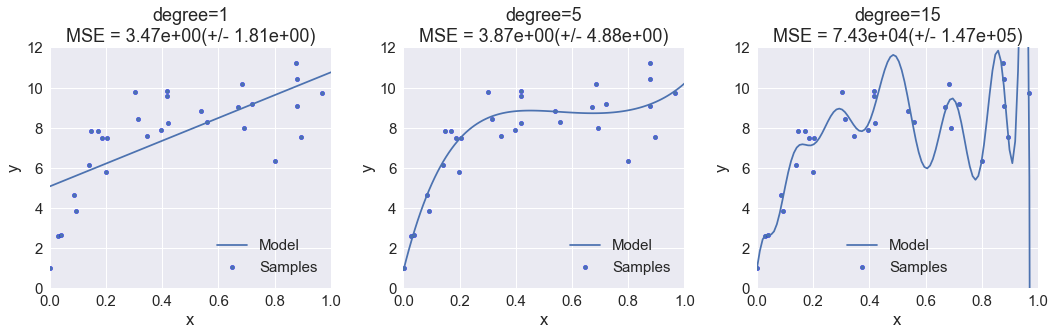

In [4]:
error = 1.0
n_samples = 30
np.random.seed(1)
X = np.random.random(n_samples)
y = rand_func(X, error)

degrees = [1, 5, 15]

plt.figure(figsize=(15, 5))

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y,
                             scoring="neg_mean_squared_error", cv=5)

    X_test = np.linspace(0, 1, 100)

    ax = plt.subplot(1, len(degrees), i + 1)
    ax.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label="Model")
    ax.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((0, 12))
    plt.legend(loc="best")
    plt.title("degree={}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    plt.tight_layout()

plt.show()

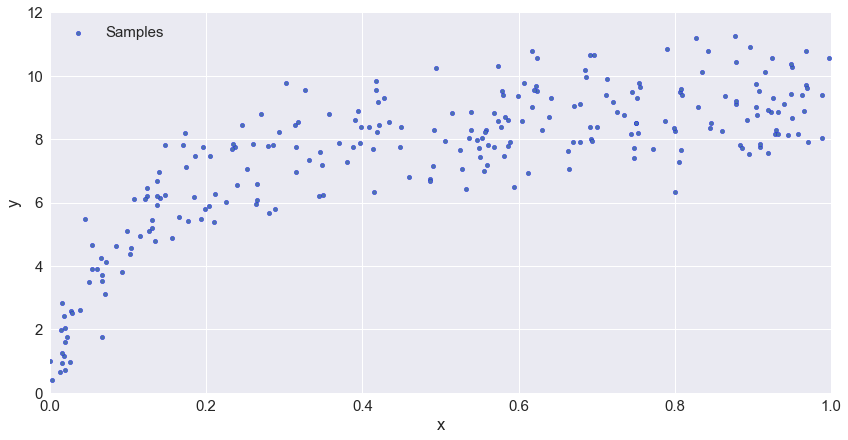

In [5]:
# Load Sample Data
error = 1.0
n_samples = 250
np.random.seed(1)
X = np.random.random(n_samples)
y = rand_func(X, error)

plt.figure(figsize=(14, 7))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((0, 12))
plt.legend(loc="best")

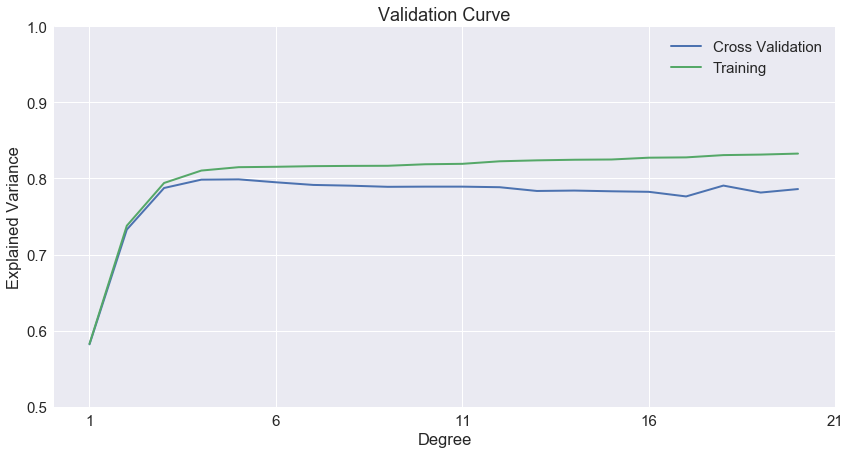

In [11]:
degrees = np.arange(1, 21)

model = make_pipeline(StandardScaler(),
                      PolynomialFeatures(),
                      LinearRegression())

train_scores, validation_scores = validation_curve(
                 model, X.reshape(-1, 1), y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees, cv=5)

plt.figure(figsize=(14, 7))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='Cross Validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='Training')
plt.xlabel('Degree')
plt.ylabel('Explained Variance')
plt.title('Validation Curve')
plt.xticks([1, 6, 11, 16, 21])
plt.ylim((0.5, 1))
plt.legend(loc='best')

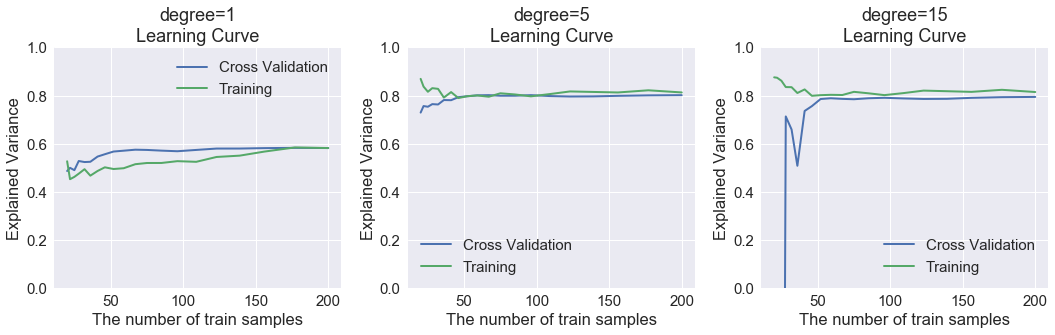

In [681]:
degrees = [1, 5, 15]

plt.figure(figsize=(15, 5))

for i in range(len(degrees)):
    d = degrees[i]
    model = make_pipeline(StandardScaler(),
                          PolynomialFeatures(degree=d),
                          LinearRegression())
    
#     model = make_pipeline(StandardScaler(),
#                           PolynomialFeatures(degree=d),
#                           Ridge(alpha=10, fit_intercept=True))
    
#     model = make_pipeline(StandardScaler(),
#                           PolynomialFeatures(degree=d),
#                           Lasso(alpha=0.001))

    train_sizes, train_scores, validation_scores = learning_curve(
        model, X.reshape(-1, 1), y,
        train_sizes=np.logspace(-1, 0, 20), cv=5)

    ax = plt.subplot(1, len(degrees), i + 1)
    ax.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='Cross Validation')
    ax.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='Training')
    plt.xlabel('The number of train samples')
    plt.ylabel('Explained Variance')
    plt.title('degree=%i\nLearning Curve' % d)
    plt.ylim((0, 1))
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()